# Loading our dataset

In [1]:
import pandas as pd

In [28]:
poorly_formatted_rows = [2120259, 2446317, 11141080, 11152098, 11152401, 11882086, 12902538, 12935043, 17589538]
df = pd.read_csv('lastfm_data/userid-timestamp-artid-artname-traid-traname.tsv', header=None, skiprows=poorly_formatted_rows, sep='\t')
df.columns = ['user_id', 'timestamp', 'artist_id', 'artist_name', 'track_id', 'track_name']
df.dropna(inplace=True)

In [29]:
df.sample(5)

,user_id,timestamp,artist_id,artist_name,track_id,track_name
13762337,user_000727,2009-03-07T01:36:06Z,ce4c6e95-35a1-452f-bf4e-5a6a88a8b258,Blotted Science,975d9193-6fee-434c-a933-619a125f580a,Oscillation Cycles
15894224,user_000823,2007-03-26T15:17:46Z,dbbc47a5-1338-4830-9298-a8d0b11c0a46,Joss Stone,85d6b744-868f-4d51-9020-cd81aa64fedf,Super Duper Love (Are You Diggin' On Me?)
13824375,user_000728,2008-01-24T18:06:17Z,44c64a30-1d58-49c5-b314-6e02fba49526,久石譲,552f77af-2dee-4b3a-aef1-e5d16b230366,The Legend Of Ashitaka Theme
10105972,user_000540,2008-08-25T14:18:05Z,1b21301f-f27d-4223-89c2-4cd0fc996696,Felixdroid,56ff5414-d77c-480a-aa18-9efa4af1991c,The Longing - Part 14
515669,user_000022,2007-07-10T18:30:10Z,789e5db3-502b-4f13-8039-88c70e053fa5,Good Shoes,9bdb67f4-22c3-466a-a32d-5f84ef2ace2c,Things To Make And Do


In [30]:
df.describe()

,user_id,timestamp,artist_id,artist_name,track_id,track_name
count,16936134,16936134,16936134,16936134,16936134,16936134
unique,992,15631466,83905,81751,960402,693231
top,user_000949,2009-02-26T21:29:15Z,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,db16d0b3-b8ce-4aa8-a11a-e4d53cc7f8a6,Intro
freq,172042,193,111488,111488,3991,14908


In [5]:
del df['timestamp']

# Playing around with Surprise

In [6]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

In [7]:
data = Dataset.load_builtin('ml-100k')

In [8]:
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9385  0.9358  0.9419  0.9352  0.9372  0.9377  0.0024  
MAE (testset)     0.7407  0.7371  0.7425  0.7365  0.7388  0.7391  0.0023  
Fit time          10.13   10.40   10.52   10.40   6.00    9.49    1.75    
Test time         0.55    0.26    0.27    0.16    0.16    0.28    0.14    


{'fit_time': (10.132296562194824,
  10.39742636680603,
  10.52276062965393,
  10.395923137664795,
  6.004263877868652),
 'test_mae': array([ 0.74069571,  0.73705742,  0.74254311,  0.73650192,  0.73882928]),
 'test_rmse': array([ 0.93850606,  0.93578811,  0.94193239,  0.93519034,  0.93721248]),
 'test_time': (0.5499627590179443,
  0.25868797302246094,
  0.2707200050354004,
  0.15741896629333496,
  0.16045880317687988)}

In [9]:
from surprise import accuracy
from surprise.model_selection import train_test_split

In [10]:
trainset, testset = train_test_split(data, test_size=.25)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9379


0.93790820815147069

In [11]:
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.9395


0.93946015181008091

In [12]:
from surprise import KNNBasic

In [13]:
trainset = data.build_full_trainset()
algo = KNNBasic()
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [14]:
uid = str(196)
iid = str(302)

pred = algo.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.06   {'actual_k': 40, 'was_impossible': False}


# Playing with surprise and our dataset

## Exploring how to get unique song-to-user relations

In [31]:
user_x = 'user_000199'
user_x_df = df[df['user_id'] == user_x]
user_x_df

,user_id,timestamp,artist_id,artist_name,track_id,track_name
3864601,user_000199,2009-05-01T06:10:06Z,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,d4dde6f2-561e-4fdc-8fd7-1926d359d3ad,Off The Piranha
3864602,user_000199,2009-05-01T06:07:43Z,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,d4dde6f2-561e-4fdc-8fd7-1926d359d3ad,Off The Piranha
3864603,user_000199,2009-05-01T06:03:10Z,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,c6eba975-14a2-401c-9f76-a297bad9079e,Bloody Knuckles
3864604,user_000199,2009-05-01T05:58:43Z,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,8323ed17-3d3f-41f7-9b0c-7da5044db4cf,Head First
3864605,user_000199,2009-05-01T05:55:03Z,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,8c6260d0-fc0e-43cc-ae05-7079982724bc,Dead On Arrival
3864606,user_000199,2009-05-01T05:52:06Z,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,811b4ea3-d439-4722-b30a-2991373ac049,Eighty-Six
3864607,user_000199,2009-05-01T05:50:10Z,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,7dec1ffa-ebd2-4075-a200-f5d25daed3b5,Controlled Burn
3864608,user_000199,2009-05-01T05:46:42Z,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,67d85c24-59de-43b9-9f5e-f469b88a87c4,Dividing Line
3864609,user_000199,2009-05-01T05:44:12Z,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,1e557571-e6aa-467d-9ae2-a1423bf0d5aa,The Art Of Selling
3864610,user_000199,2009-05-01T05:41:16Z,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,a94bdb2c-5caf-46af-b8df-0fde8a9c5670,Black Beneath The Eyes


In [32]:
print(len(user_x_df['track_id'].unique()))
print(len(user_x_df['track_id']))

14668
84617


In [35]:
df = df.groupby(['user_id', 'track_id']).size().reset_index(name='listen_count')

In [36]:
df.sample(10)

,user_id,track_id,listen_count
2283571,user_000611,03691c75-a2bd-48c4-8788-b892c624d39d,1
3466908,user_000870,b39203ca-9f35-48fc-b9db-ad5b8b7e4066,2
596223,user_000152,ea8b451c-e197-4b5e-8457-a5abfdcc22e9,4
1273992,user_000341,2ba10ce4-06fc-4887-872a-3a81671e22c5,2
868083,user_000223,786e1009-2663-49e0-873d-f0cf06f51a25,1
6048,user_000002,7ac12265-58ff-4e18-bf18-8b21cb2707ca,23
1016439,user_000268,04b5b048-ae6a-4a65-8fb0-ce6dea7a0684,1
3957290,user_001000,e47193c9-7643-4a23-a18a-9b2aed6e051d,5
3305384,user_000837,19084069-642f-465f-9127-f71bcd800a05,5
2212748,user_000588,3cee0759-4713-44bf-a30b-1a3cede70522,2


## Exploration on listen count

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

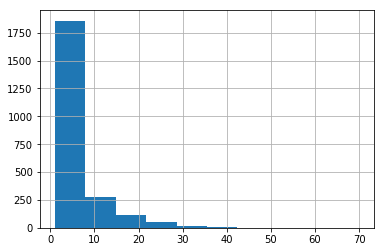

In [51]:
df[df['user_id'] == 'user_000001']['listen_count'].hist()

Listen count is definitely not normal nor uniform. It's closer to some kind of exponential distribution. How to normalize it to a rating system?

## Getting the new df to Surprise